In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the cleaned dataset
exploded_df = pd.read_csv('../data/processed/cleaned_data_exploded.csv')
imploded_df = pd.read_csv('../data/processed/cleaned_data_imploded.csv')

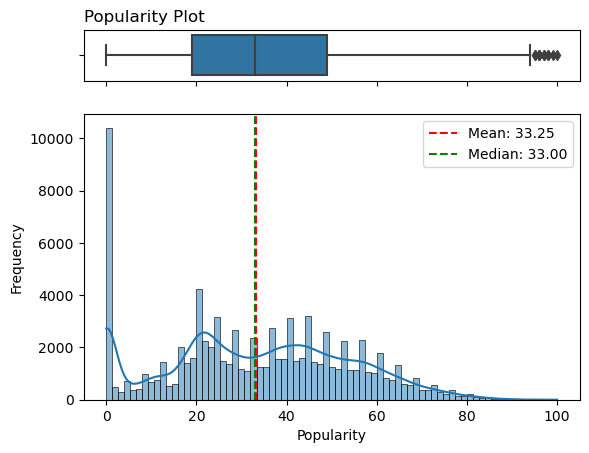

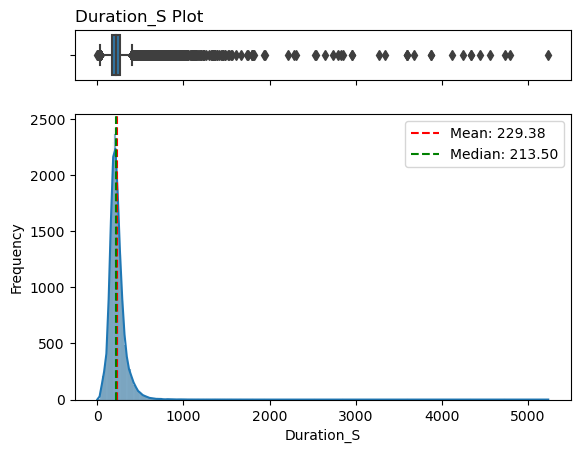

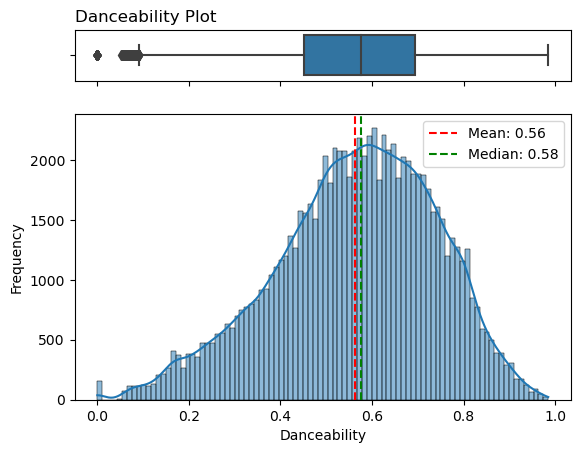

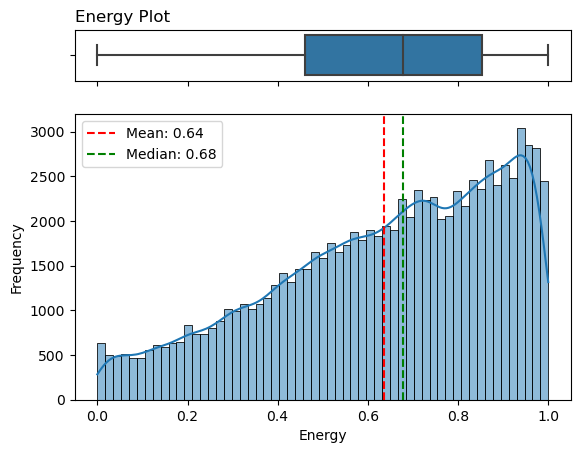

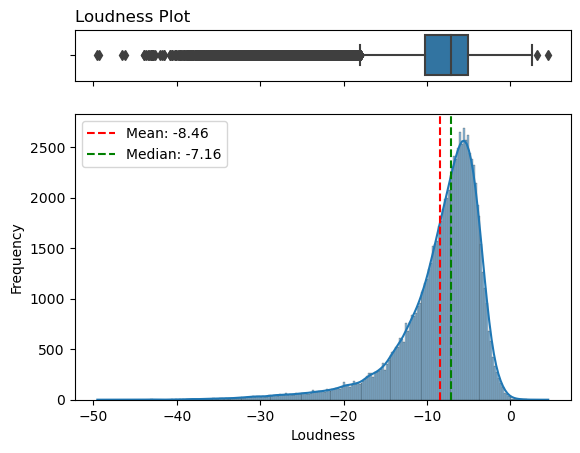

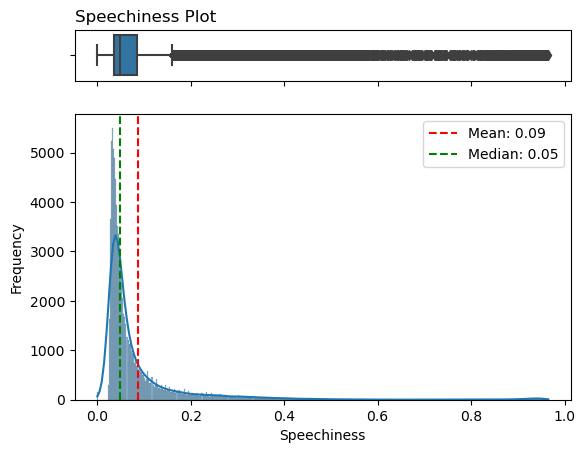

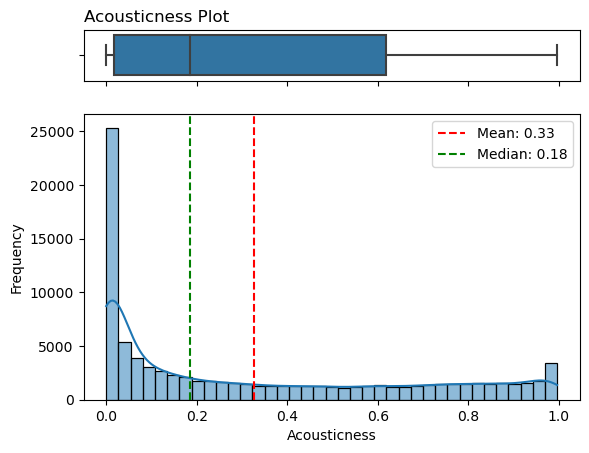

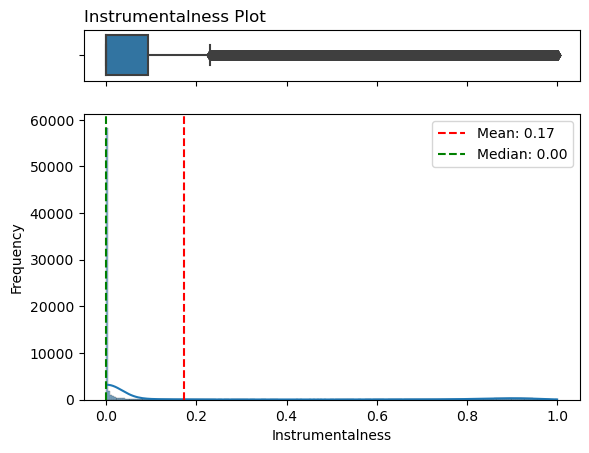

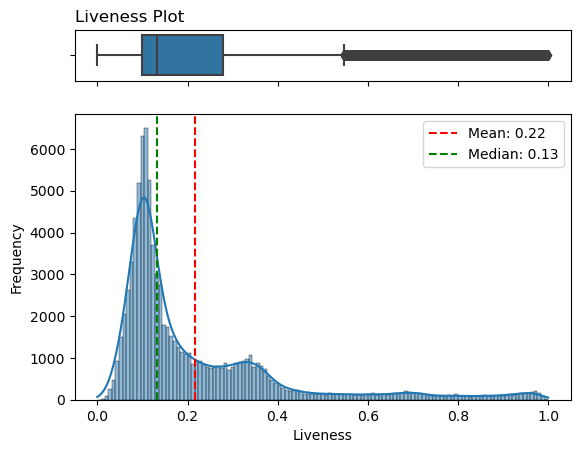

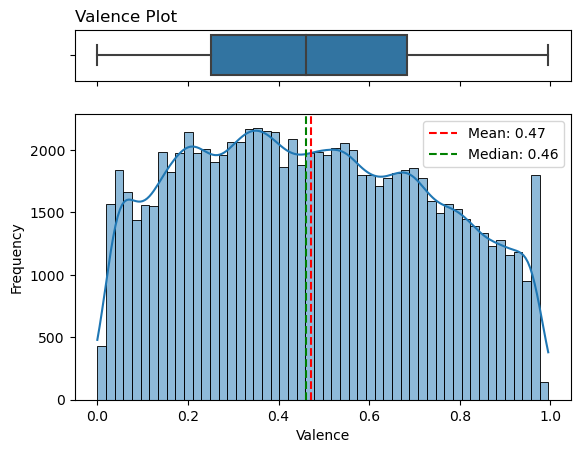

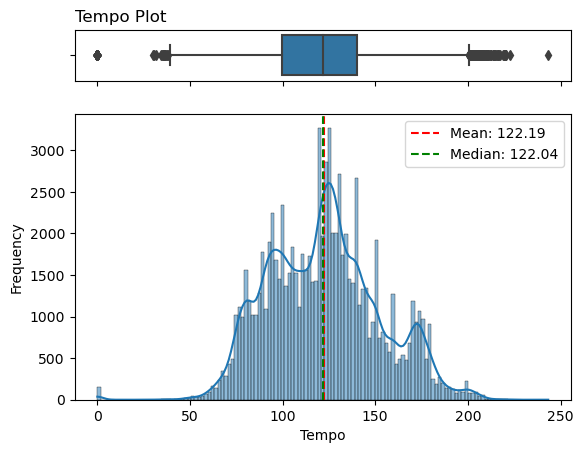

In [3]:
columns_to_plot = ['popularity', 'duration_s', 'danceability', 'energy',
                    'loudness', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo']

for col in columns_to_plot:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    sns.boxplot(x=imploded_df[col], ax=ax_box, orient='h')
    sns.histplot(imploded_df[col], ax=ax_hist, kde=True)
    
    ax_box.set_xlabel('')
    ax_hist.set_xlabel(col.title())
    
    mean_val = imploded_df[col].mean()
    median_val = imploded_df[col].median()
    ax_hist.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='g', linestyle='--', label=f'Median: {median_val:.2f}')
    ax_hist.legend()
    
    ax_box.set_title(f'{col.title()} Plot', loc='left')
    
    ax_hist.set_ylabel('Frequency')
    
    plt.show()


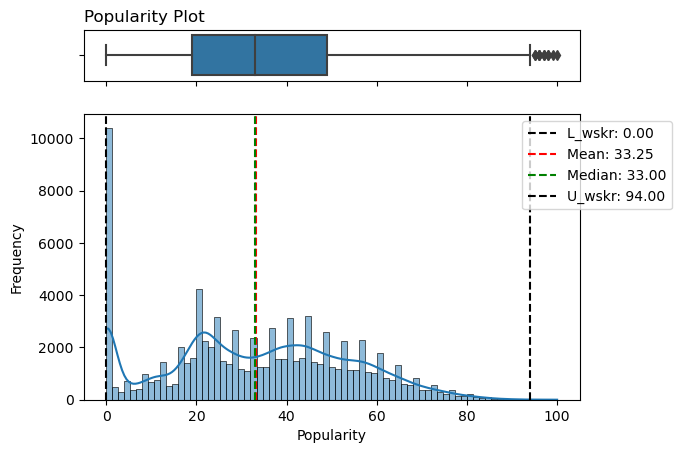

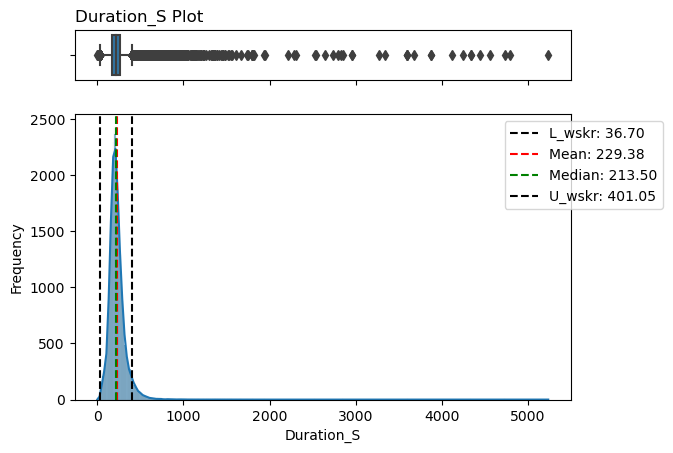

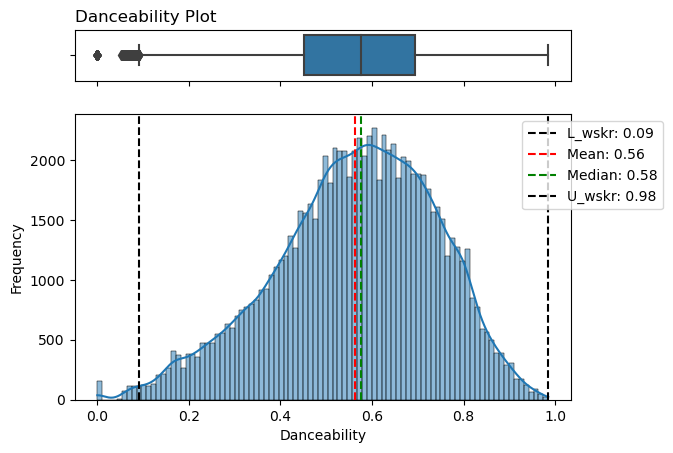

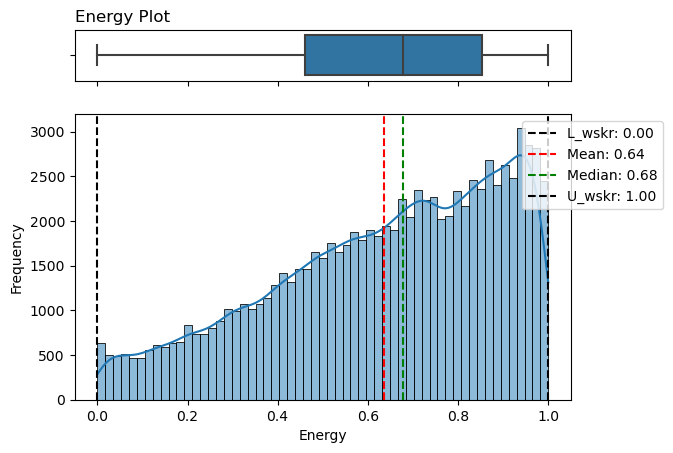

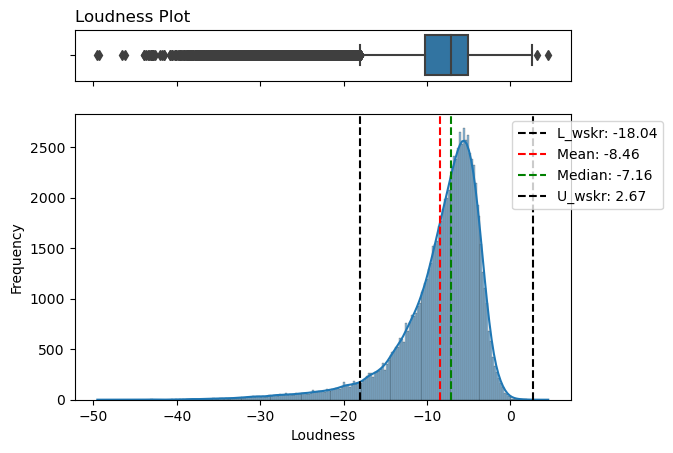

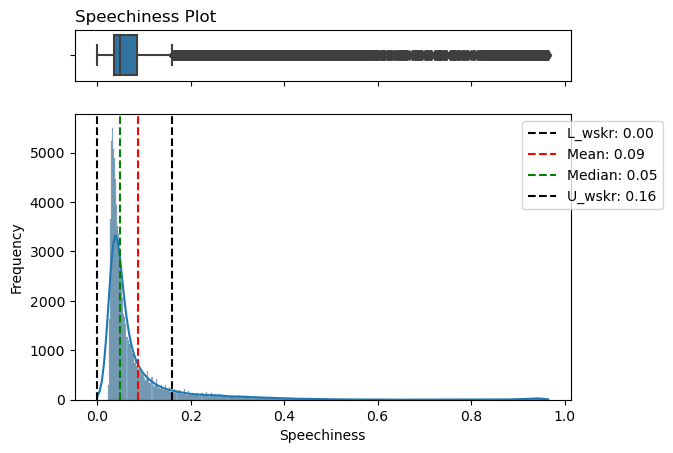

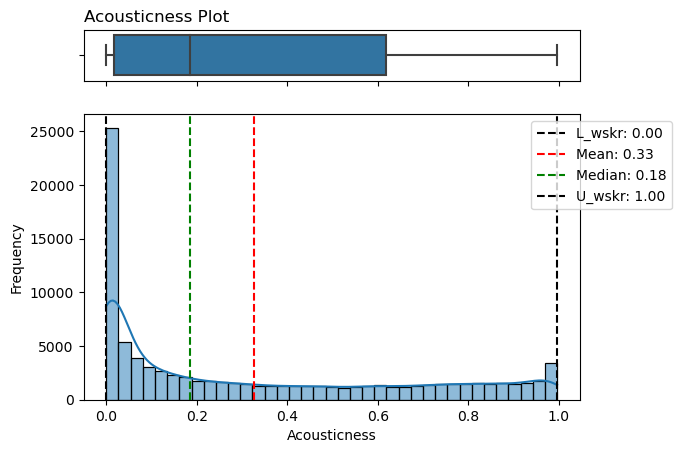

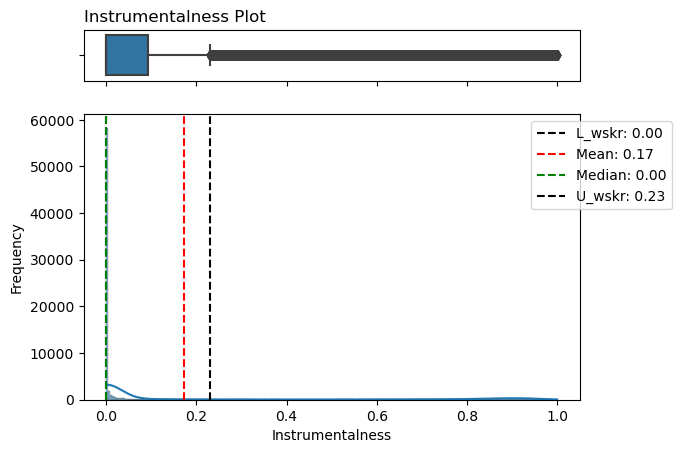

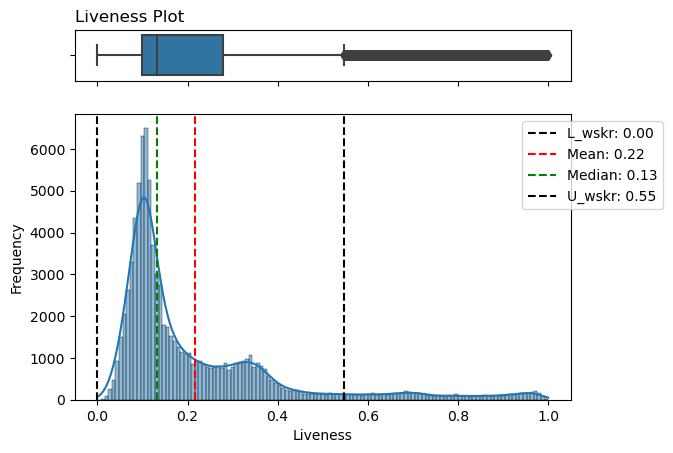

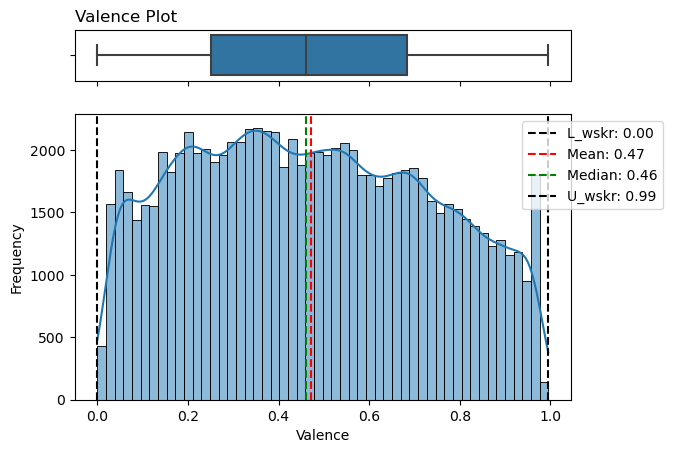

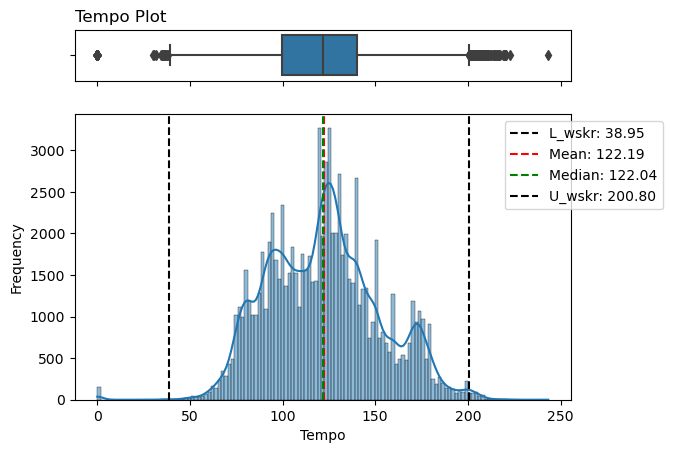

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['popularity', 'duration_s', 'danceability', 'energy',
                    'loudness', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo']

for col in columns_to_plot:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    sns.boxplot(x=imploded_df[col], ax=ax_box, orient='h')
    sns.histplot(imploded_df[col], ax=ax_hist, kde=True)
    
    ax_box.set_xlabel('')
    ax_hist.set_xlabel(col.title())
    
    mean_val = imploded_df[col].mean()
    median_val = imploded_df[col].median()
    
    q25 = imploded_df[col].quantile(0.25)
    q75 = imploded_df[col].quantile(0.75)
    iqr = q75 - q25
    
    lower_limit = max(imploded_df[col].min(), q25 - 1.5 * iqr)
    upper_limit = min(imploded_df[col].max(), q75 + 1.5 * iqr)
    
    ax_hist.axvline(lower_limit, color='black', linestyle='--', label=f'L_wskr: {lower_limit:.2f}')
    ax_hist.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='g', linestyle='--', label=f'Median: {median_val:.2f}')
    ax_hist.axvline(upper_limit, color='black', linestyle='--', label=f'U_wskr: {upper_limit:.2f}')
    
    ax_hist.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    
    ax_box.set_title(f'{col.title()} Plot', loc='left')
    
    ax_hist.set_ylabel('Frequency')
    
    plt.show()
